<a href="https://colab.research.google.com/github/lmoroney/tfbook/blob/master/chapter6/emotion_classifier_binary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [0]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass


In [0]:
import tensorflow as tf
import csv

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [4]:
!wget --no-check-certificate --no-cache \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/binary-emotion.csv \
    -O /tmp/binary-emotion.csv

--2020-04-07 17:50:56--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/binary-emotion.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.68.128, 2404:6800:4003:c03::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.68.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2690504 (2.6M) [application/octet-stream]
Saving to: ‘/tmp/binary-emotion.csv’

/tmp/binary-emotion 100%[===================>]   2.57M  --.-KB/s    in 0.01s   

2020-04-07 17:50:57 (173 MB/s) - ‘/tmp/binary-emotion.csv’ saved [2690504/2690504]



In [5]:
sentences=[]
labels=[]
with open('/tmp/binary-emotion.csv', encoding='UTF-8') as csvfile:
  reader = csv.reader(csvfile, delimiter=",")
  for row in reader:
    labels.append(int(row[0]))
    sentences.append(row[1])

print(len(labels))
print(len(sentences))



35327
35327


In [0]:
training_size = 28000

training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

In [0]:
vocab_size = 20000
embedding_dim = 32
max_length = 30
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"

tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [28]:
print(word_index)

{'<OOV>': 1, 'i': 2, 'to': 3, 'the': 4, 'a': 5, 'my': 6, 'and': 7, 'you': 8, 'it': 9, 'is': 10, 'in': 11, 'for': 12, 'of': 13, 'me': 14, 'on': 15, 'have': 16, 'so': 17, 'but': 18, 'that': 19, "i'm": 20, 'just': 21, 'be': 22, 'not': 23, 'with': 24, 'at': 25, 'was': 26, 'this': 27, 'now': 28, 'day': 29, 'up': 30, 'out': 31, 'get': 32, 'no': 33, 'all': 34, 'good': 35, 'like': 36, 'go': 37, 'are': 38, 'work': 39, 'do': 40, "it's": 41, 'today': 42, 'got': 43, 'quot': 44, 'going': 45, 'too': 46, 'your': 47, 'one': 48, 'from': 49, 'know': 50, 'im': 51, 'back': 52, 'what': 53, "don't": 54, 'time': 55, 'love': 56, 'really': 57, 'lol': 58, 'will': 59, 'am': 60, "can't": 61, 'about': 62, 'its': 63, 'com': 64, 'u': 65, 'we': 66, 'see': 67, 'want': 68, 'had': 69, 'can': 70, 'if': 71, 'there': 72, 'when': 73, 'home': 74, 'some': 75, '2': 76, 'new': 77, 'think': 78, 'still': 79, 'as': 80, 'how': 81, 'well': 82, 'oh': 83, 'miss': 84, 'they': 85, 'much': 86, 'off': 87, 'here': 88, 'an': 89, 'need': 90,

In [0]:

# Need this block to get it to work with TensorFlow 2.x
import numpy as np
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

In [0]:

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(.001)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(.001)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

In [32]:

num_epochs = 30
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/30
875/875 - 4s - loss: 0.6743 - accuracy: 0.6029 - val_loss: 0.5132 - val_accuracy: 0.7942
Epoch 2/30
875/875 - 4s - loss: 0.6085 - accuracy: 0.6995 - val_loss: 0.4933 - val_accuracy: 0.7972
Epoch 3/30
875/875 - 4s - loss: 0.5816 - accuracy: 0.7251 - val_loss: 0.4925 - val_accuracy: 0.7919
Epoch 4/30
875/875 - 4s - loss: 0.5655 - accuracy: 0.7374 - val_loss: 0.5018 - val_accuracy: 0.7803
Epoch 5/30
875/875 - 4s - loss: 0.5545 - accuracy: 0.7436 - val_loss: 0.4806 - val_accuracy: 0.8006
Epoch 6/30
875/875 - 4s - loss: 0.5490 - accuracy: 0.7510 - val_loss: 0.5077 - val_accuracy: 0.7749
Epoch 7/30
875/875 - 4s - loss: 0.5412 - accuracy: 0.7562 - val_loss: 0.4752 - val_accuracy: 0.8013
Epoch 8/30
875/875 - 4s - loss: 0.5365 - accuracy: 0.7591 - val_loss: 0.5040 - val_accuracy: 0.7807
Epoch 9/30
875/875 - 4s - loss: 0.5321 - accuracy: 0.7604 - val_loss: 0.5016 - val_accuracy: 0.7803
Epoch 10/30
875/875 - 4s - loss: 0.5302 - accuracy: 0.7639 - val_loss: 0.4851 - val_accuracy: 0.7946

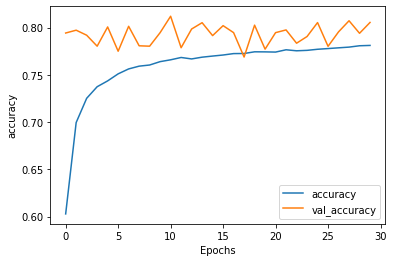

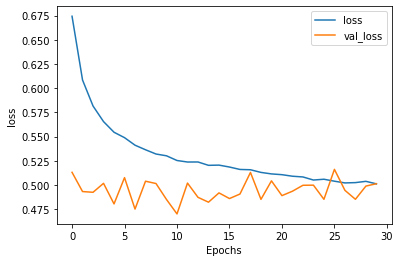

In [33]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [34]:
sentence = ["I'm really upset right now and not happy with you! ANGRY!", "She said yes! We're getting married! Wow!"]
sequences = tokenizer.texts_to_sequences(sentence)
print(sequences)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
print(model.predict(padded))

[[20, 57, 652, 118, 28, 7, 23, 117, 24, 8, 1622], [126, 269, 194, 408, 135, 1762, 267]]
[[0.1387277 ]
 [0.90460604]]
